# Naive Bayes Classifier Algorithm_Diabetes dataset

# **Importing necessary libraries

In [1]:
#importing required and necessary libraries
import numpy as np # used to perform mathematical operation on array
import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

C:\Users\neeli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Reading the dataset

In [2]:
#Reading the data of titanic dataset
diabetes_df = pd.read_csv("diabetes.csv")

# **Exploratory Data Analysis

In [3]:
#to check whether that data is balanced or imbalanced
#count the number of instances of each class label
count=diabetes_df['Outcome'].value_counts()
#calculating the percentage of instances for each class label
percentage=count/diabetes_df.shape[0]*100
#printing the class label counts and percentages
print("Class label counts: \n",count)
print("Class label percentages: \n",percentage)
#determining if the data is balanced or imbalanced
if (percentage[0] < 60 and percentage[1] < 60) or (percentage[0] > 40 and percentage[1] > 40):
    print("The data is balanced")
else:
    print("The data is imbalanced")

Class label counts: 
 0    500
1    268
Name: Outcome, dtype: int64
Class label percentages: 
 0    65.104167
1    34.895833
Name: Outcome, dtype: float64
The data is imbalanced


In [4]:
#checking the information about the dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Returns description of the data in the DataFrame
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Finding number of rows and columns of the dataframe
diabetes_df.shape

(768, 9)

In [7]:
#Checking the first 5 rows of the train data
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Checking the last 5 rows of the train data
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# **Data Preprocessing

# Checking for missing values

In [9]:
#Checking for the missing values
total = diabetes_df.isnull().sum().sort_values(ascending=False)
percent_1 = diabetes_df.isnull().sum()/diabetes_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0


# Outlier detection and treatment

In [10]:
# Select numerical columns to check for outliers
num_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin"]
# Calculate the IQR for each numerical column
Q1 = diabetes_df[num_cols].quantile(0.25)
Q3 = diabetes_df[num_cols].quantile(0.75)
IQR = Q3 - Q1
# Calculate the upper and lower bounds for each numerical column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify and remove any values that fall outside of the upper and lower bounds for each column
diabetes_outliers_removed = diabetes_df[~((diabetes_df[num_cols] < lower_bound) | (diabetes_df[num_cols] > upper_bound)).any(axis=1)]
# Print the original and new shape of the dataset to see how many outliers were removed
print("Original shape of diabetes dataset:", diabetes_df.shape)
print("Shape of diabetes dataset after removing outliers:", diabetes_outliers_removed.shape)

Original shape of diabetes dataset: (768, 9)
Shape of diabetes dataset after removing outliers: (679, 9)


In [11]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Data Visualisation

# Visualize distribution of Age

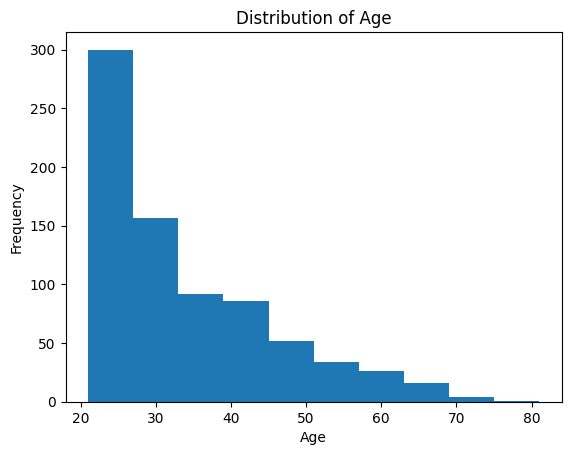

In [13]:
# Visualize distribution of Age
plt.hist(diabetes_df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize relationship between Age and Blood Pressure

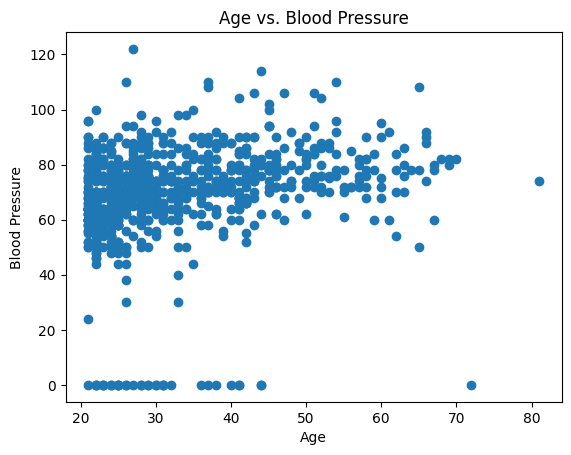

In [14]:
# Visualize relationship between Age and Blood Pressure
plt.scatter(diabetes_df['Age'], diabetes_df['BloodPressure'])
plt.title('Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()


# **Splitting data into training and testing sets

In [15]:
# Split the dataset into training and testing sets
train_data = diabetes_df.iloc[:700,:]
test_data = diabetes_df.iloc[700:,:]

# **Input-Output split

In [16]:
# Separate the features and target variables
X_train = train_data.drop("Outcome", axis=1).values
y_train = train_data["Outcome"].values
X_test = test_data.drop("Outcome", axis=1).values
y_test = test_data["Outcome"].values

# **Feature Selection

In [17]:
# Compute the Pearson correlation coefficient between each feature and the target variable
correlations = {}
for i, feature_name in enumerate(diabetes_df.columns[:-1]):
    correlation = np.corrcoef(X_train[:, i], y_train)[0, 1]
    correlations[feature_name] = correlation

# Sort the features by their correlation with the target variable
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with the highest correlation with the target variable
selected_features = [f[0] for f in sorted_features[:5]]

# Select the same features from X_train and X_test
X_train_selected = X_train[:, [np.where(diabetes_df.columns == feature_name)[0][0] for feature_name in selected_features]]
X_test_selected = X_test[:, [np.where(diabetes_df.columns == feature_name)[0][0] for feature_name in selected_features]]

print('Selected features:', selected_features)
print('Shape of X_train_selected:', X_train_selected.shape)
print('Shape of X_test_selected:', X_test_selected.shape)


Selected features: ['Glucose', 'BMI', 'Pregnancies', 'Age', 'DiabetesPedigreeFunction']
Shape of X_train_selected: (700, 5)
Shape of X_test_selected: (68, 5)


# **Feature Scaling

In [18]:
# Compute the mean and standard deviation of each feature in X_train_selected
means = np.mean(X_train_selected, axis=0)
stds = np.std(X_train_selected, axis=0)

# Perform feature scaling on X_train_selected and X_test_selected
X_train_scaled = (X_train_selected - means) / stds
X_test_scaled = (X_test_selected - means) / stds
print('X_train_scaled shape',X_train_scaled.shape)
print('X_test_scaled shape',X_test_scaled.shape)

X_train_scaled shape (700, 5)
X_test_scaled shape (68, 5)


# **Implement Gaussian Naive Bayes classifier

# Defining classes

In [19]:
# Define the Gaussian Naive Bayes algorithm
class GaussianNaiveBayes:
    def fit(self, X_train_scaled, y_train):
        self.classes = np.unique(y_train)
        self.mean = np.zeros((len(self.classes), X_train_scaled.shape[1]))
        self.var = np.zeros((len(self.classes), X_train_scaled.shape[1]))

        for i, c in enumerate(self.classes):
            X_c = X_train_scaled[y_train == c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0)
    
    def prob_density(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X_test_scaled):
        y_pred = np.zeros(X_test_scaled.shape[0])

        for i, x in enumerate(X_test_scaled):
            posteriors = []

            for j, c in enumerate(self.classes):
                prior = np.log(len(X_train_scaled[y_train==c]) / len(X_train_scaled))
                posterior = np.sum(np.log(self.prob_density(j, x)))
                posterior = prior + posterior
                posteriors.append(posterior)

            y_pred[i] = self.classes[np.argmax(posteriors)]

        return y_pred
    


In [20]:
#import time to calculate start and end time
import time
# record start time
start_time = time.time()

In [21]:
# Train the model on the training data
gnb = GaussianNaiveBayes()
gnb.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test_scaled)

In [22]:
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.])

In [23]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the model: {:.2f} seconds".format(time_taken))

Time taken to run the model: 0.07 seconds


# **Model Evaluation

In [24]:
accuracy = np.sum(y_test == y_pred) / len(y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7941176470588235


# Creating confusion matrix

Normalized confusion matrix
[[0.80952381 0.19047619]
 [0.21276596 0.78723404]]


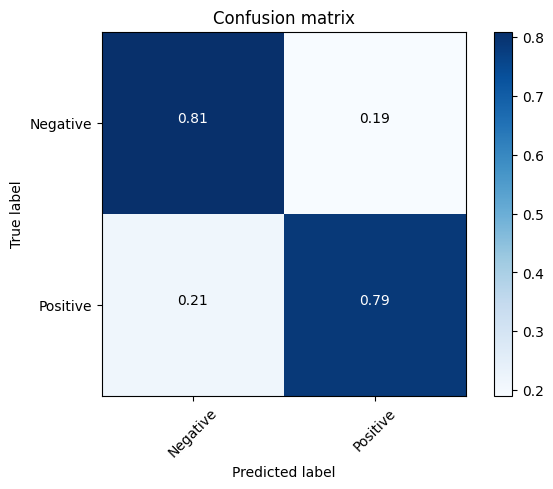

In [25]:
def confusion_matrix(y_pred, y_test): 
    matrix = np.zeros((2,2)) 
    for i in range(len(y_pred)): 
        if int(y_pred[i])==1 and int(y_test[i])==1: 
            matrix[0,0]+=1 #True Positives
        elif int(y_pred[i])==1 and int(y_test[i])==0:
            matrix[0,1]+=1 #False Positives
        elif int(y_pred[i])==0 and int(y_test[i])==1:
            matrix[1,0]+=1 #False Negatives
        elif int(y_pred[i])==0 and int(y_test[i])==0:
            matrix[1,1]+=1 #True Negatives
    accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])
    precision = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    recall = matrix[0,0]/(matrix[0,0]+matrix[1,0])
    f1 = 2 * (precision * recall) / (precision + recall)
    return matrix,accuracy, precision, recall, f1

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm, accuracy, precision, recall, f1 = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'], normalize=True, title='Confusion matrix')

# Computing Classification report

In [26]:
# Define a function to compute the classification report
def classification_report(y_test, y_pred):
    classes = np.unique(y_test)
    report = {'accuracy': np.mean(y_test == y_pred)}

    # Compute precision, recall, and F1-score for each class
    for c in classes:
        true_indices = np.where(y_test == c)[0]
        pred_indices = np.where(y_pred == c)[0]
        tp = len(np.intersect1d(true_indices, pred_indices))
        fp = len(pred_indices) - tp
        fn = len(true_indices) - tp
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        report[c] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': len(true_indices)}

    # Compute macro-average precision, recall, and F1-score
    macro_precision = np.mean([report[c]['precision'] for c in classes])
    macro_recall = np.mean([report[c]['recall'] for c in classes])
    macro_f1_score = np.mean([report[c]['f1-score'] for c in classes])
    report['macro avg'] = {'precision': macro_precision, 'recall': macro_recall, 'f1-score': macro_f1_score,
                           'support': len(y_test)}

    # Compute micro-average precision, recall, and F1-score
    micro_precision = np.sum([report[c]['precision'] * report[c]['support'] for c in classes]) / len(y_test)
    micro_recall = np.sum([report[c]['recall'] * report[c]['support'] for c in classes]) / len(y_test)
    micro_f1_score = np.sum([report[c]['f1-score'] * report[c]['support'] for c in classes]) / len(y_test)
    report['micro avg'] = {'precision': micro_precision, 'recall': micro_recall, 'f1-score': micro_f1_score,
                           'support': len(y_test)}

    return report

# Compute the classification report
report = classification_report(y_test, y_pred)

# Define the column names for the table
columns = ['Class', 'Precision', 'Recall', 'F1-score', 'Support']

# Create the table object
from prettytable import PrettyTable
table = PrettyTable(columns)

# Add the rows to the table
for c in report.keys():
    if c not in ['accuracy', 'macro avg', 'micro avg']:
        precision = report[c]['precision']
        recall = report[c]['recall']
        f1_score = report[c]['f1-score']
        support = report[c]['support']
        row = [c, precision, recall, f1_score, support]
        table.add_row(row)

# Add the macro-average row to the table
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1_score = report['macro avg']['f1-score']
macro_support = report['macro avg']['support']
macro_row = ['macro avg', macro_precision, macro_recall, macro_f1_score, macro_support]
table.add_row(macro_row)

micro_precision = report['micro avg']['precision']
micro_recall = report['micro avg']['recall']
micro_f1_score = report['micro avg']['f1-score']
micro_support = report['micro avg']['support']
micro_row = ['micro avg', micro_precision, micro_recall, micro_f1_score, micro_support]
table.add_row(micro_row)

print(table)


+-----------+--------------------+--------------------+--------------------+---------+
|   Class   |     Precision      |       Recall       |      F1-score      | Support |
+-----------+--------------------+--------------------+--------------------+---------+
|     0     | 0.7872340425531915 | 0.9024390243902439 | 0.8409090909090909 |    41   |
|     1     | 0.8095238095238095 | 0.6296296296296297 | 0.7083333333333334 |    27   |
| macro avg | 0.7983789260385006 | 0.7660343270099368 | 0.7746212121212122 |    68   |
| micro avg | 0.7960843912032898 | 0.7941176470588235 |  0.78826871657754  |    68   |
+-----------+--------------------+--------------------+--------------------+---------+


# Performing evaluation metrics

In [27]:
def confusion_matrix(y_pred, y_test): 
    matrix = np.zeros((2,2)) 
    for i in range(len(y_pred)): 
        if int(y_pred[i])==1 and int(y_test[i])==1: 
            matrix[0,0]+=1 #True Positives
        elif int(y_pred[i])==1 and int(y_test[i])==0:
            matrix[0,1]+=1 #False Positives
        elif int(y_pred[i])==0 and int(y_test[i])==1:
            matrix[1,0]+=1 #False Negatives
        elif int(y_pred[i])==0 and int(y_test[i])==0:
            matrix[1,1]+=1 #True Negatives
    accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])
    precision = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    recall = matrix[0,0]/(matrix[0,0]+matrix[1,0])
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

In [28]:
accuracy, precision, recall, f1 = confusion_matrix(y_pred, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7941176470588235
Precision: 0.8095238095238095
Recall: 0.6296296296296297
F1 score: 0.7083333333333334


# Plotting ROC curve

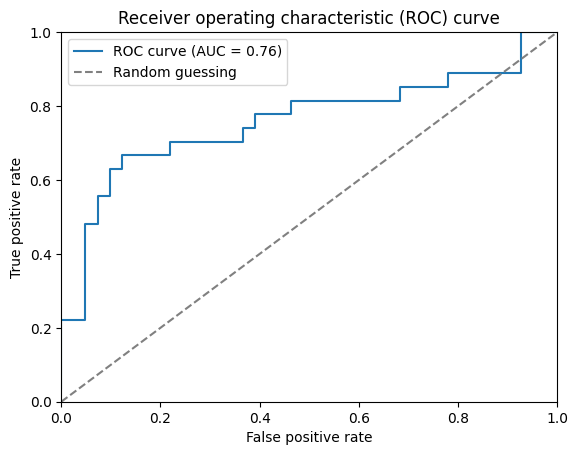

In [29]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
sorted_indices = np.argsort(y_pred)[::-1]
sorted_y_true = y_test[sorted_indices]
cumulative_tp = np.cumsum(sorted_y_true)
cumulative_fp = np.cumsum(1 - sorted_y_true)
tpr = cumulative_tp / cumulative_tp[-1]
fpr = cumulative_fp / cumulative_fp[-1]
thresholds = y_pred[sorted_indices]

# Convert arrays to integer type
sorted_indices = sorted_indices.astype(int)

# Calculate the AUC-ROC score using the trapezoidal rule
auc_roc = np.trapz(tpr, fpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()